# 09 Heart Disease Classifictaion

## Package Imports

In [54]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    roc_curve,
    roc_auc_score,
    confusion_matrix,
    ConfusionMatrixDisplay,
    classification_report,
)
from sklearn.model_selection import cross_val_score, train_test_split

## Data Import

In [55]:
df = pd.read_csv("./data/heart-disease.csv")

X = df.drop("target", axis=1)
y = df["target"]

## Evaluation with .score()

In [56]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

model = RandomForestClassifier()
model.fit(X_train, y_train)

model_score = model.score(X_test, y_test)
model_score

0.8524590163934426

## Evaluation with cross_val_score()

In [57]:
model_scores = scores = cross_val_score(
    RandomForestClassifier(), X, y, cv=5, scoring="accuracy"
)
model_score = np.mean(scores)
model_score

0.8249726775956285

## Evaluation with ROC Curve

0.9112554112554113

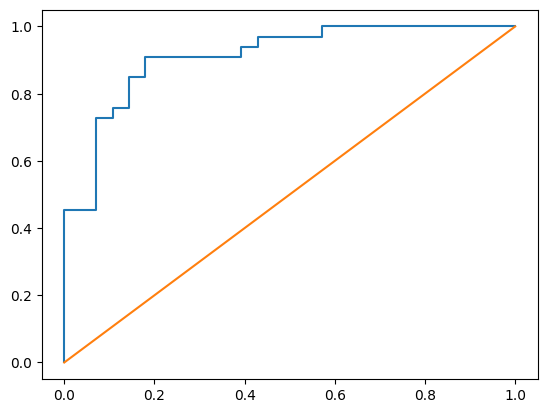

In [58]:
# Area under Receiver Operating Characteristiv Curve (ROC/AUC) => TPR-to-FPR rate

model = RandomForestClassifier()
model.fit(X_train, y_train)

y_predict_probabilities = model.predict_proba(X_test)
y_predict_positive = y_predict_probabilities[:, 1]

fp_rate, tp_rate, thresholds = roc_curve(y_test, y_predict_positive)

fig, ax = plt.subplots()
ax.plot(fp_rate, tp_rate)
ax.plot([0, 1], [0, 1])

model_score = roc_auc_score(y_test, y_predict_positive)
model_score

## Evaluation with Confusion Matrix

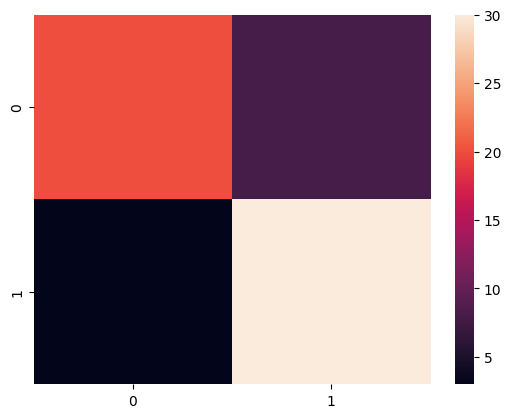

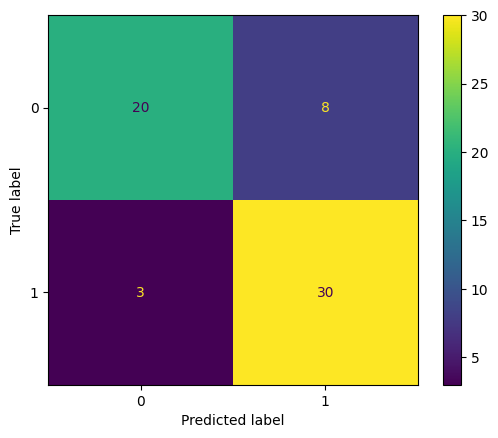

In [59]:
model = RandomForestClassifier()
model.fit(X_train, y_train)

# Option 1: Manual
y_predict = model.predict(X_test)
y_confusion = confusion_matrix(y_test, y_predict)
sns.heatmap(y_confusion)

# Option 2: Automatic
confusion_matrix_display = ConfusionMatrixDisplay.from_estimator(model, X_test, y_test)

## Evaluation with Classification Report

In [60]:
model = RandomForestClassifier()
model.fit(X_train, y_train)

y_predict = model.predict(X_test)

pd.DataFrame(classification_report(y_test, y_predict, output_dict=True))

,0,1,accuracy,macro avg,weighted avg
precision,0.884615,0.857143,0.868852,0.870879,0.869753
recall,0.821429,0.909091,0.868852,0.865260,0.868852
f1-score,0.851852,0.882353,0.868852,0.867102,0.868352
support,28.000000,33.000000,0.868852,61.000000,61.000000
